# Data Cleaning and Wrangling Practice

### Objectives:
* Load, clean, and explore real-world datasets using Python and pandas.
* Generate insights through descriptive statistics and visualizations.
* Communicate findings effectively via notebooks and charts.
* Apply data analysis skills to a project using a public dataset.

### Public dataset source:
[Kaggle Cat Dataset](https://www.kaggle.com/datasets/joannanplkrk/its-raining-cats?select=cat_breeds_dirty.csv)
This dataset contains ~1000 items with data on 3 different cat breeds (Maine coon, Ragdoll and Angora). It includes information about animal's breed, age, gender, body length, weight, fur colour and pattern, eye colour, sleeping and playing time, country (including latitude and longitude) etc. The data was artificially generated.

In [39]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time 
from sklearn.feature_selection import mutual_info_regression

## Discovery: Understanding the data, its structure, and what it contains

In [3]:
# Establish file path and import data
path = 'cat_breeds_data.csv'
data = pd.read_csv(path, delimiter=';')

# Look at a snapshot of the data
data.head()

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3.0,female,False,19.0,2.0,white,solid,blue,FALSE,wet,46.0,16.0,France,43.296482,5.369780
1,Angora,0.33,4.0,male,False,19.0,2.5,white,solid,blue,FALSE,wet,48.0,16.0,France,43.611660,3.877710
2,Angora,0.50,NaN,NaN,False,20.0,2.8,what does it mean dominant?,solid,green,I never allow my kitty outside!!!!!,wet,41.0,11.0,France,44.837789,-0.579180
3,Ankora,0.50,NaN,NaN,False,21.0,3.0,white,dirty,blue,FALSE,wet,24.0,8.0,France,43.611660,3.877710
4,Angora,0.50,NaN,NaN,NaN,21.0,3.0,red/cream,tabby,green,FALSE,wet,51.0,10.0,france,48.864716,2.349014


In [5]:
data.describe()

,Age_in_years,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,1072.000000,1066.000000,1077.000000,1077.000000,1082.000000,1062.000000,1042.000000,1042.000000
mean,4.460752,53.778612,43.903435,5.740901,23.176525,15.898305,44.550898,-59.517623
std,3.262166,39.355581,16.240466,9.853438,10.815298,2.656775,4.931844,46.259368
min,-7.666667,-92.000000,10.000000,0.500000,0.000000,8.000000,37.774930,-123.116226
25%,2.330000,28.000000,35.000000,3.900000,15.000000,14.000000,40.714270,-77.036370
50%,4.750000,57.000000,41.000000,5.000000,23.000000,16.000000,43.296482,-74.005970
75%,6.920000,84.000000,51.000000,7.000000,31.000000,18.000000,48.864716,-1.890401
max,11.250000,135.000000,102.000000,320.000000,60.000000,32.000000,53.800755,13.404954


In [7]:
data.describe(include=['object', 'category']) # print a table summarizing all categorical columns (count, unique, top is most frequent)\

,Breed,Gender,Neutered_or_spayed,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Country
count,991,1036,1050,1090,1055,1064,1060,1082,1028
unique,12,2,2,7,7,6,4,3,11
top,Ragdoll,male,True,seal,solid,blue,FALSE,wet,USA
freq,374,522,613,292,452,541,960,757,640


In [9]:
# Preview unique values for categorical columns
for col in data.select_dtypes(include=['object', 'category']):
    print(f"{col}:\n{data[col].unique()}")

Breed:
['Angora' 'Ankora' nan 'angora' 'Angorra' 'My coon' 'Maine coon'
 'Maine loon' 'maine coon' 'ragdoll' 'Ragdoll' 'rack doll' 'wrack doll']
Gender:
['female' 'male' nan]
Neutered_or_spayed:
[False nan True]
Fur_colour_dominant:
['white' 'what does it mean dominant?' 'red/cream' 'black' nan
 'brown/chocolate' 'seal' 'lilac']
Fur_pattern:
['solid' 'dirty' 'tabby' nan 'bicolor' 'tortie' 'colorpoint' 'mitted']
Eye_colour:
['blue' 'green' 'amber' 'cute' nan 'I dont know. Its pretty!' 'yellow']
Allowed_outdoor:
['FALSE' 'I never allow my kitty outside!!!!!' nan 'TRUE'
 "I dont allow her outside. I'm a responsible owner"]
Preferred_food:
['wet' 'a lot of food' 'dry' nan]
Country:
['France' 'france' nan 'La France!!!!' 'Vive la France!' 'USA' 'Germany'
 'Canada' 'my country' 'where I live' 'with me' 'UK']


In [10]:
# Show each column data type
print(data.dtypes)

Breed                       object
Age_in_years               float64
Age_in_months              float64
Gender                      object
Neutered_or_spayed          object
Body_length                float64
Weight                     float64
Fur_colour_dominant         object
Fur_pattern                 object
Eye_colour                  object
Allowed_outdoor             object
Preferred_food              object
Owner_play_time_minutes    float64
Sleep_time_hours           float64
Country                     object
Latitude                   float64
Longitude                  float64
dtype: object


In [11]:
# Check for null values
print(data.isna().sum())

Breed                      112
Age_in_years                31
Age_in_months               37
Gender                      67
Neutered_or_spayed          53
Body_length                 26
Weight                      26
Fur_colour_dominant         13
Fur_pattern                 48
Eye_colour                  39
Allowed_outdoor             43
Preferred_food              21
Owner_play_time_minutes     21
Sleep_time_hours            41
Country                     75
Latitude                    61
Longitude                   61
dtype: int64


## Cleaning: Modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted

In [12]:
# Only keep rows where there is a value for at least one of the following columns
df = data[~data[['Breed', 'Weight', 'Body_length', 'Fur_pattern', 'Fur_colour_dominant']].isna().all(axis=1)]
df = data.copy()

In [13]:
# Remove incorrect values. Some Age_in_years appear to be negative
df['Age_in_years'] = df['Age_in_years'].abs()
df['Age_in_months'] = df['Age_in_months'].abs()

# Calculate age in months from years
mask = df['Age_in_months'].isna()
df.loc[mask, 'Age_in_months'] = df.loc[mask, 'Age_in_years'] * 12

# Calculate age in years from months
mask2 = df['Age_in_years'].isna()
df.loc[mask2,'Age_in_years'] = df.loc[mask2,'Age_in_months'] / 12

In [15]:
# Calculate body length and weight from average within breed (by age)
# Note, there are 112 missing values from this column
# Define one-year increment bins
min_age = int(df['Age_in_years'].min())
max_age = int(df['Age_in_years'].max()) + 1  
bins = list(range(min_age, max_age + 1)) 

# Create Age_bracket column
df['Age_bracket'] = pd.cut(  
    df['Age_in_years'],
    bins=bins,
    right=False,
    labels=[f'{i}-{i+1}' for i in bins[:-1]]  
)

# Fill missing Weight by (Breed AND Age_bracket) mean
df['Weight'] = df['Weight'].fillna(
    df.groupby(['Breed','Age_bracket'], observed=True)['Weight'].transform('mean')
)

df['Body_length'] = df['Body_length'].fillna(
    df.groupby(['Breed','Age_bracket'], observed=True)['Body_length'].transform('mean')
)

In [ ]:
# There is one body weight that is incorrect (too high)
df.loc[df['Weight'] == 320]
df['Weight'] = df['Weight'].replace({
    320: 3.2
})

In [ ]:
# Fur pattern, eye color, and color dominant replace with most common value from that breed
# Compute mode per Breed and broadcast it to rows
mode_per_breed = df.groupby('Breed')['Fur_colour_dominant'].transform(lambda x: x.mode().iloc[0])

# Fill missing values with that mode
df['Fur_colour_dominant'] = df['Fur_colour_dominant'].fillna(mode_per_breed)

In [20]:
# Initialize the geocoder
geolocator = Nominatim(user_agent="myGeocoder")

# From geopy documentation:
# Define reverse geocode function
def reverse_geocode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', exactly_one=True)
        if location and 'country' in location.raw['address']:
            return location.raw['address']['country']
    except Exception as e:
        print(f"Error for ({lat}, {lon}): {e}")
    return None

In [21]:
# Determine country from latitude/longitude and vice versa
# Find rows where Country is NA and loop through
mask = df['Country'].isna()

for idx, row in df[mask].iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    
    if pd.notna(lat) and pd.notna(lon):
        country = reverse_geocode(lat, lon)
        df.loc[idx, 'Country'] = country
        
        print(f"Filled row {idx} with Country: {country}")
        
        # Respect rate limit
        time.sleep(1)

Filled row 16 with Country: France
Filled row 17 with Country: France
Filled row 18 with Country: France
Filled row 19 with Country: France
Filled row 257 with Country: United States
Filled row 258 with Country: United States
Filled row 259 with Country: United States
Filled row 260 with Country: United States
Filled row 261 with Country: United States
Filled row 262 with Country: United States
Filled row 263 with Country: United Kingdom
Filled row 264 with Country: United Kingdom
Filled row 265 with Country: United Kingdom
Filled row 266 with Country: United Kingdom
Filled row 267 with Country: United Kingdom
Filled row 284 with Country: United Kingdom
Filled row 285 with Country: United Kingdom
Filled row 286 with Country: United Kingdom
Filled row 287 with Country: United Kingdom
Filled row 288 with Country: United Kingdom
Filled row 289 with Country: United Kingdom
Filled row 290 with Country: United Kingdom
Filled row 291 with Country: United Kingdom
Filled row 298 with Country: U

In [22]:
# Given a country name, return the longitude and latitude
def geocode_country(country_name):
    try:
        location = geolocator.geocode(country_name, exactly_one=True)
        if location:
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error for {country_name}: {e}")
    return None, None

# Define mask: rows where Country is not NA, but Latitude or Longitude is NA
mask = df['Country'].notna() & (df['Latitude'].isna() | df['Longitude'].isna())

# Loop through these rows
for idx, row in df[mask].iterrows():
    country = row['Country']
    lat, lon = geocode_country(country)
    
    df.loc[idx, 'Latitude'] = lat
    df.loc[idx, 'Longitude'] = lon
    
    print(f"Filled row {idx}: Country={country}, Lat={lat}, Lon={lon}")
    
    # Respect rate limit
    time.sleep(1)

Filled row 998: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 999: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1000: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1001: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1002: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1003: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1004: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1005: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1006: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1007: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1008: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1009: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1041: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1042: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1043: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row 1044: Country=USA, Lat=39.7837304, Lon=-100.445882
Filled row

In [25]:
# Impute typos, inconsistent casing, synonyms/close variants, mistyped answers, garbage entry, wrong data types
# Deal with categorical data (capitalization and incorrect, open-ended answers)

## Breed
# create dictionary mapping
breed_mapping = {
    'ankora': 'Angora',
    'angora': 'Angora',
    'angorra': 'Angora',
    'my coon': 'Maine Coon',
    'maine loon': 'Maine Coon',
    'maine coon': 'Maine Coon',
    'ragdoll': 'Ragdoll',
    'rack doll': 'Ragdoll',
    'wrack doll': 'Ragdoll'
}
# Makes all values consistent. same casing and no extra spaces
df['Breed'] = df['Breed'].str.strip().str.lower() # normalize casing to be all lower case and remove any leading/trailing whitespace
df['Breed'] = df['Breed'].replace(breed_mapping) # goes through each value in Breed, and replaces it with the corresponding value in mapping
#df['Breed'] = df['Breed'].str.title() # optional, cosmetic

# one entry put fur_pattern in fur_colour_domiant (seal color should be colorpoint pattern)
# Move 'seal' value from Fur_colour_dominant to Fur_pattern as 'colorpoint'
mask = df['Fur_colour_dominant'] == 'seal' # find where seal is (row)
df.loc[mask, 'Fur_pattern'] = 'colorpoint' # replace the same row but different column with new value

## Fur_colour_dominant
df['Fur_colour_dominant'] = df['Fur_colour_dominant'].replace({
    'what does it mean dominant?': np.nan,
    'lilac': np.nan,
    'seal':'cream' # remove seal from the row
})

# Eye_colour
df['Eye_colour'] = df['Eye_colour'].replace({
    'cute': np.nan,
    'I dont know. Its pretty!': np.nan,
    'amber': 'yellow'
})

# Fur_pattern
df['Fur_pattern'] = df['Fur_pattern'].replace({
    'dirty': np.nan,
    'mitted':'colorpoint'
})

df['Allowed_outdoor'] = df['Allowed_outdoor'].replace({
    'I never allow my kitty outside!!!!!': 'FALSE',
    "I dont allow her outside. I'm a responsible owner": 'FALSE'
})

df['Preferred_food'] = df['Preferred_food'].replace({
    'a lot of food': np.nan
})

df['Country'] = df['Country'].replace({
    'france': 'France',
    'La France!!!!': 'France',
    'Vive la France!': 'France',
    'my country': np.nan,
    'where I live': np.nan,
    'with me': np.nan,
    'USA': 'United States',
    'UK': 'United Kingdom'
})

In [ ]:
# According to the data visulization in the next section:
# Replace the categorical missing values with those that are the most common in the breed if there is a clear majority

# Eye color
# Replace maine coon with yellow and ragdoll with blue. Difficult to discern for angora
mask = (df['Breed'] == 'Ragdoll') & (df['Eye_colour'].isna()) # Define mask for rows where Breed is Ragdoll AND Eye_colour is NA
df.loc[mask, 'Eye_colour'] = 'blue'

mask = (df['Breed'] == 'Maine Coon') & (df['Eye_colour'].isna()) 
df.loc[mask, 'Eye_colour'] = 'yellow'

# Fur pattern
# Replace angora with solid and ragdoll with colorpoint. Difficult to discern for maine coon
mask2 = (df['Breed'] == 'Ragdoll') & (df['Fur_pattern'].isna()) 
df.loc[mask2, 'Fur_pattern'] = 'colorpoint' 

mask2 = (df['Breed'] == 'Angora') & (df['Fur_pattern'].isna())
df.loc[mask2, 'Fur_pattern'] = 'solid'

# Fur color
# Replace angora with white and ragdoll with cream. Difficult to discern for maine coon
mask3 = (df['Breed'] == 'Ragdoll') & (df['Fur_colour_dominant'].isna()) 
df.loc[mask3, 'Fur_colour_dominant'] = 'cream'

mask3 = (df['Breed'] == 'Angora') & (df['Fur_colour_dominant'].isna()) 
df.loc[mask3, 'Fur_colour_dominant'] = 'white' 

In [ ]:
# All cream fur color and colorpoint pattern are ragdolls (according to domain knowledge)
mask = (df['Fur_colour_dominant'] == 'cream') & (df['Breed'].isna())
df.loc[mask, 'Breed'] = 'Ragdoll'

mask = (df['Fur_pattern'] == 'colorpoint') & (df['Breed'].isna())
df.loc[mask, 'Breed'] = 'Ragdoll'

In [31]:
df_clean = df.copy()

## Exploratory data analysis and Visualization: descriptive statistics, correlations, basic visualizations

In [ ]:
# Filter rows where Breed is 'Angora'
angora_rows = df[df['Breed'] == 'Angora']

# Calculate mean for Body_length and Weight
avg_body_length = angora_rows['Body_length'].mean()
avg_weight = angora_rows['Weight'].mean()

# Print results
print(f"Average Body Length for Angora: {avg_body_length}")
print(f"Average Weight for Angora: {avg_weight}")

Average Body Length for Angora: 35.56201550387597
Average Weight for Angora: 3.8170542635658915


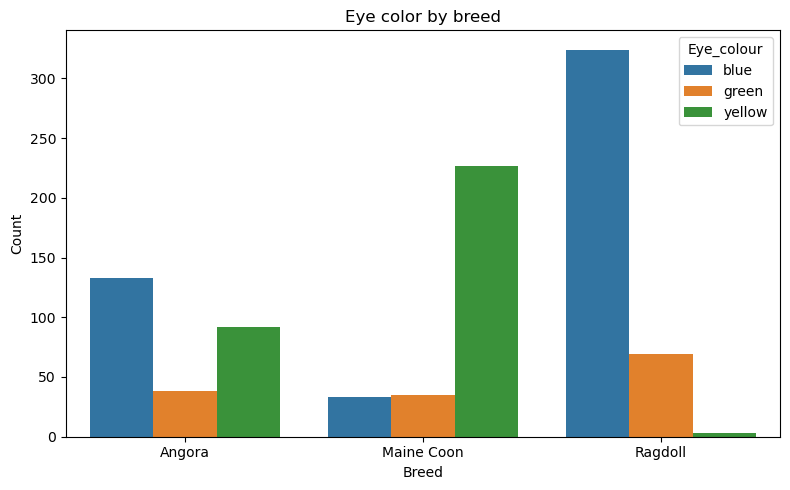

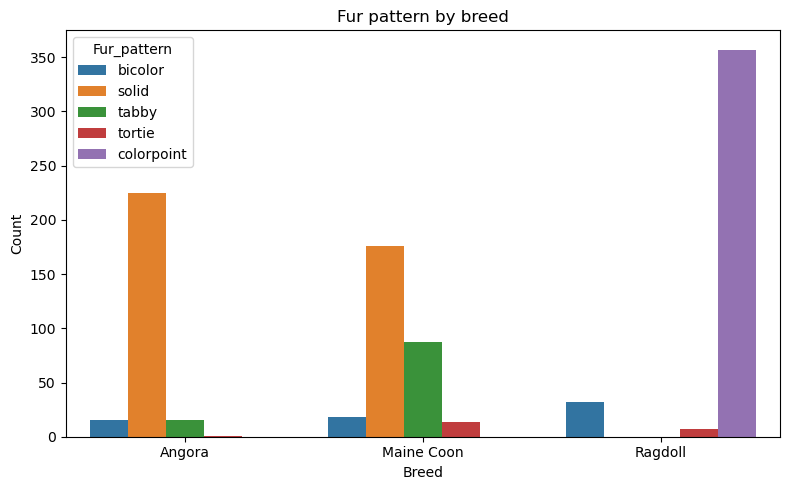

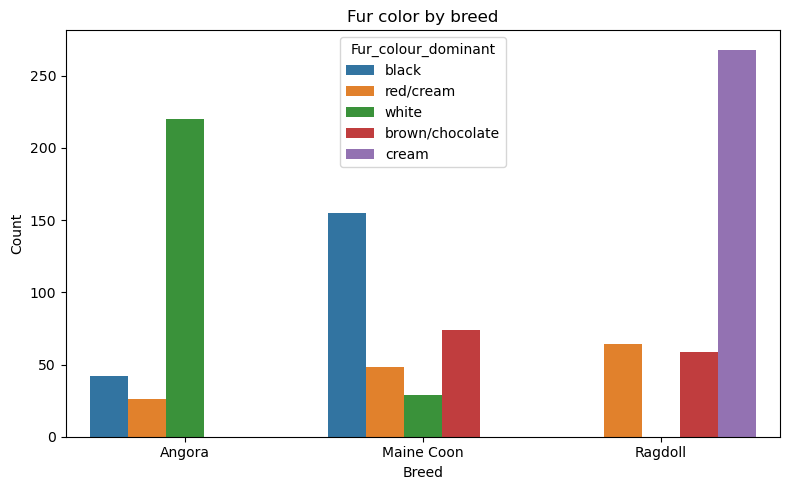

In [ ]:
# Split data by group
eye_counts = df.groupby(['Breed', 'Eye_colour']).size().reset_index(name='count') 

# Eye color
plt.figure(figsize=(8,5))
sns.barplot(data=eye_counts, x='Breed', y='count', hue='Eye_colour')
plt.title('Eye color by breed')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fur pattern
fur_pattern_counts = df.groupby(['Breed', 'Fur_pattern']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=fur_pattern_counts, x='Breed', y='count', hue='Fur_pattern')
plt.title('Fur pattern by breed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Fur color
fur_color_counts = df.groupby(['Breed', 'Fur_colour_dominant']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=fur_color_counts, x='Breed', y='count', hue='Fur_colour_dominant')
plt.title('Fur color by breed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

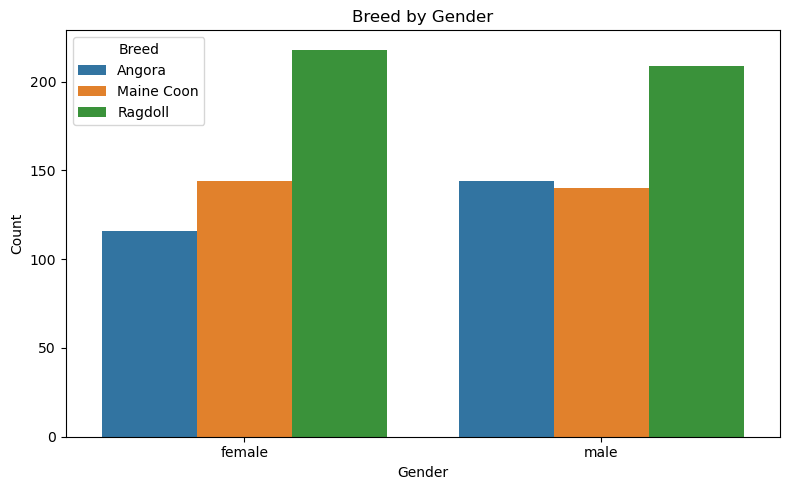

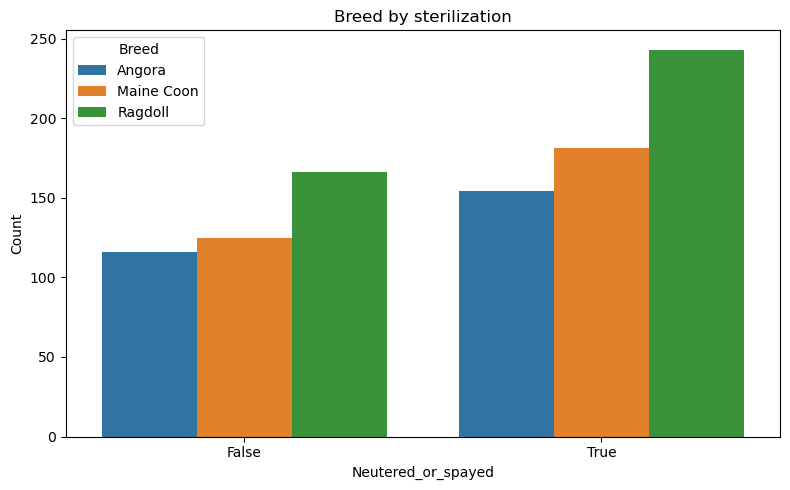

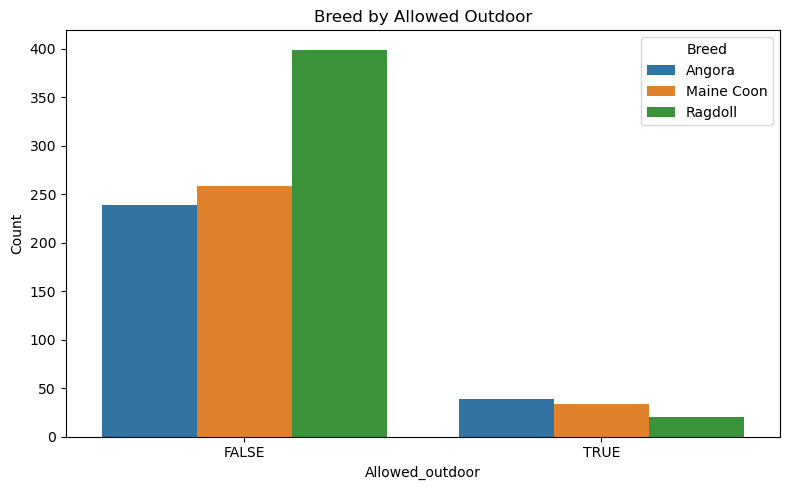

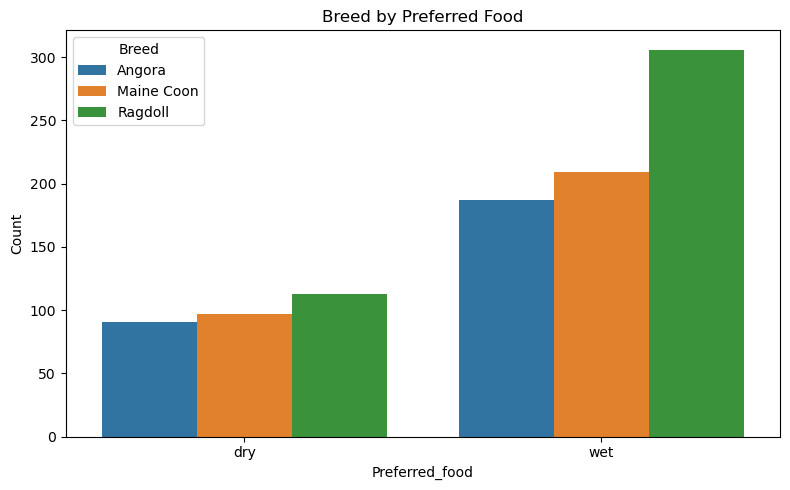

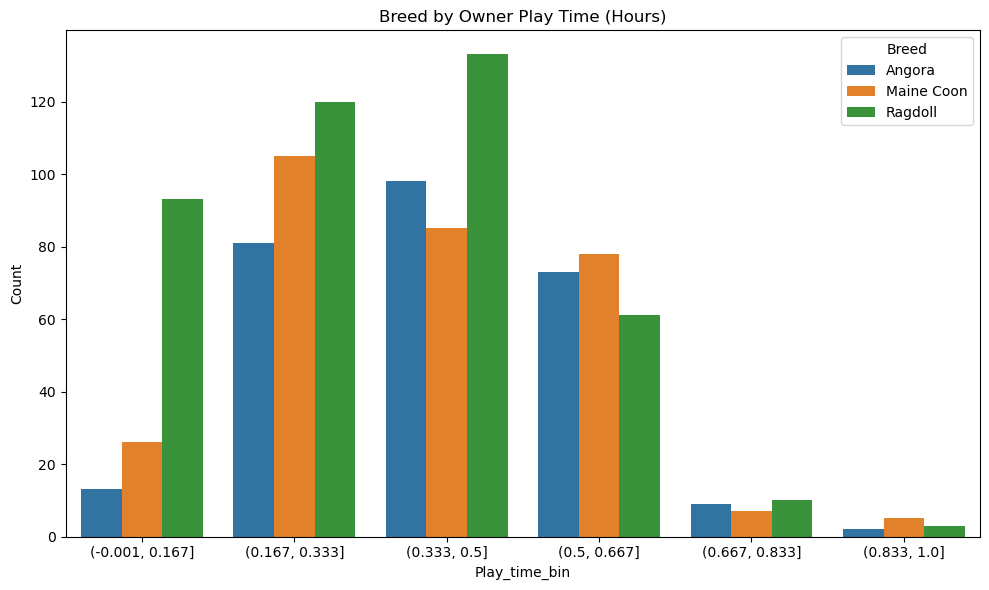

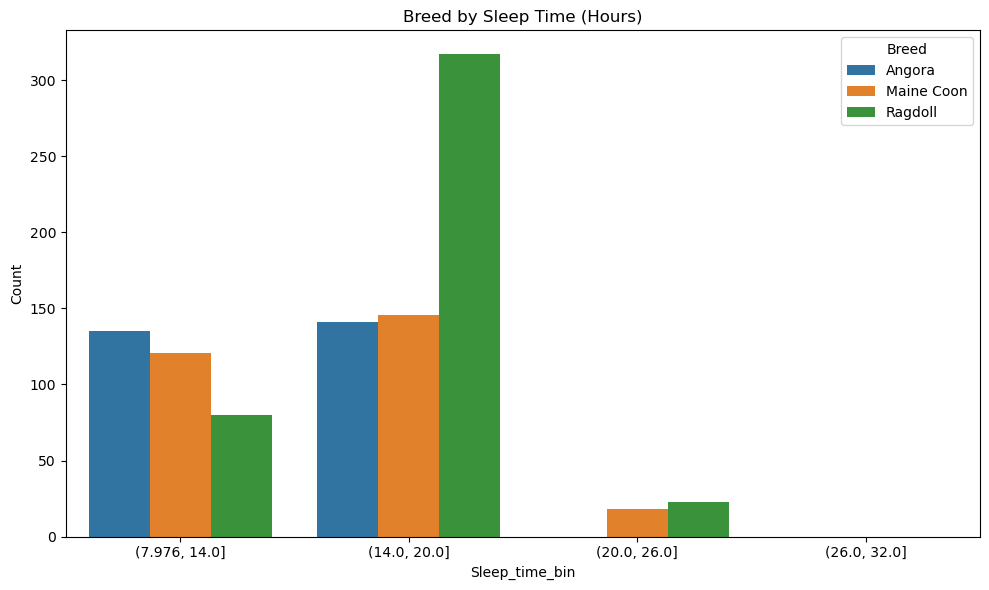

In [ ]:
# More visualizations

# Gender
gender_counts = df.groupby(['Breed', 'Gender']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=gender_counts, x='Gender', y='count', hue='Breed')
plt.title('Breed by Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Pretty equally distributed, as I thought

# Sterilization
fixed_counts = df.groupby(['Breed','Neutered_or_spayed']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=fixed_counts, x='Neutered_or_spayed', y='count', hue='Breed')
plt.title('Breed by sterilization')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Also pretty equally distributed

# Outdoor
outdoor_counts = df.groupby(['Breed','Allowed_outdoor']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=outdoor_counts, x='Allowed_outdoor', y='count', hue='Breed')
plt.title('Breed by Allowed Outdoor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Mostly false, but not much differnece amongst the 3 breeds

# Preferred food
food_counts = df.groupby(['Breed','Preferred_food']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=food_counts, x='Preferred_food', y='count', hue='Breed')
plt.title('Breed by Preferred Food')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Mostly wet, but not much differnece amongst the 3 breeds

# Playtime
df['Owner_play_time_hours'] = df['Owner_play_time_minutes'] / 60 # convert minutes to hours first
df['Play_time_bin'] = pd.cut(df['Owner_play_time_hours'], bins=6) # Automatically create 6 equal-width bins based on min/max
playtime_counts = df.groupby(['Breed','Play_time_bin'], observed=True).size().reset_index(name='count') # count

plt.figure(figsize=(10,6))
sns.barplot(data=playtime_counts, x='Play_time_bin', y='count', hue='Breed')
plt.title('Breed by Owner Play Time (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Most owners play with their cats between 0.167 and 0.667 hours per day, but between-breed difference is indistinguishable

# Sleep time
df['Sleep_time_bin'] = pd.cut(df['Sleep_time_hours'], bins=4) # Automatically create 6 equal-width bins based on min/max
playtime_counts = df.groupby(['Breed','Sleep_time_bin'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=playtime_counts, x='Sleep_time_bin', y='count', hue='Breed')
plt.title('Breed by Sleep Time (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [32]:
# Encoding
# Label encoding (integer) for data viz purposes
df_clean['Fur_colour_dominant_encoded'] = df_clean['Fur_colour_dominant'].factorize()[0]
df_clean['Fur_pattern_encoded'] = df_clean['Fur_pattern'].factorize()[0]
df_clean['Eye_colour_encoded'] = df_clean['Eye_colour'].factorize()[0]
df_clean['Gender_encoded'] = df_clean['Gender'].factorize()[0]
df_clean['Breed_encoded'] = df_clean['Breed'].factorize()[0]

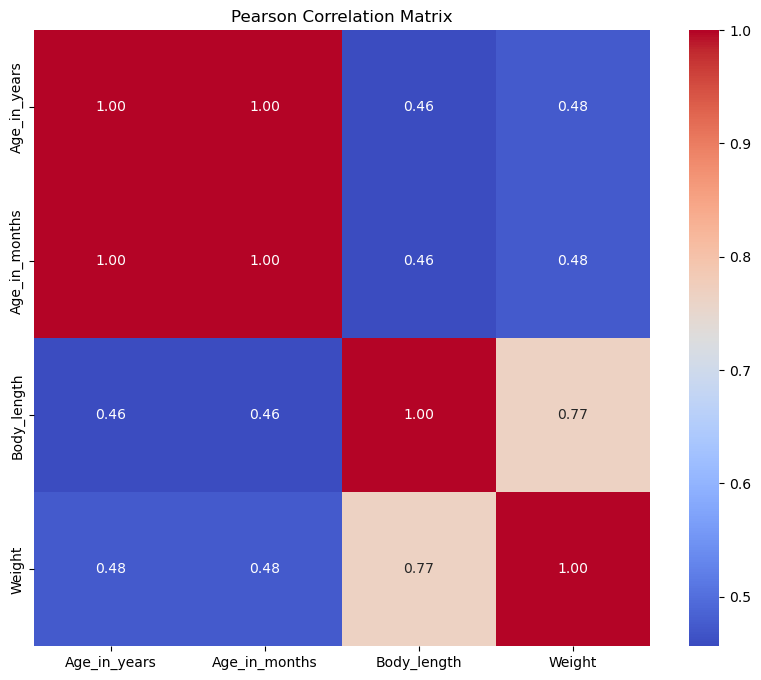

In [ ]:
# Pearson correlation, only numerical
pears_cols = ['Age_in_years','Age_in_months','Body_length','Weight']

corr_matrix = df_clean[pears_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson Correlation Matrix")
plt.show()

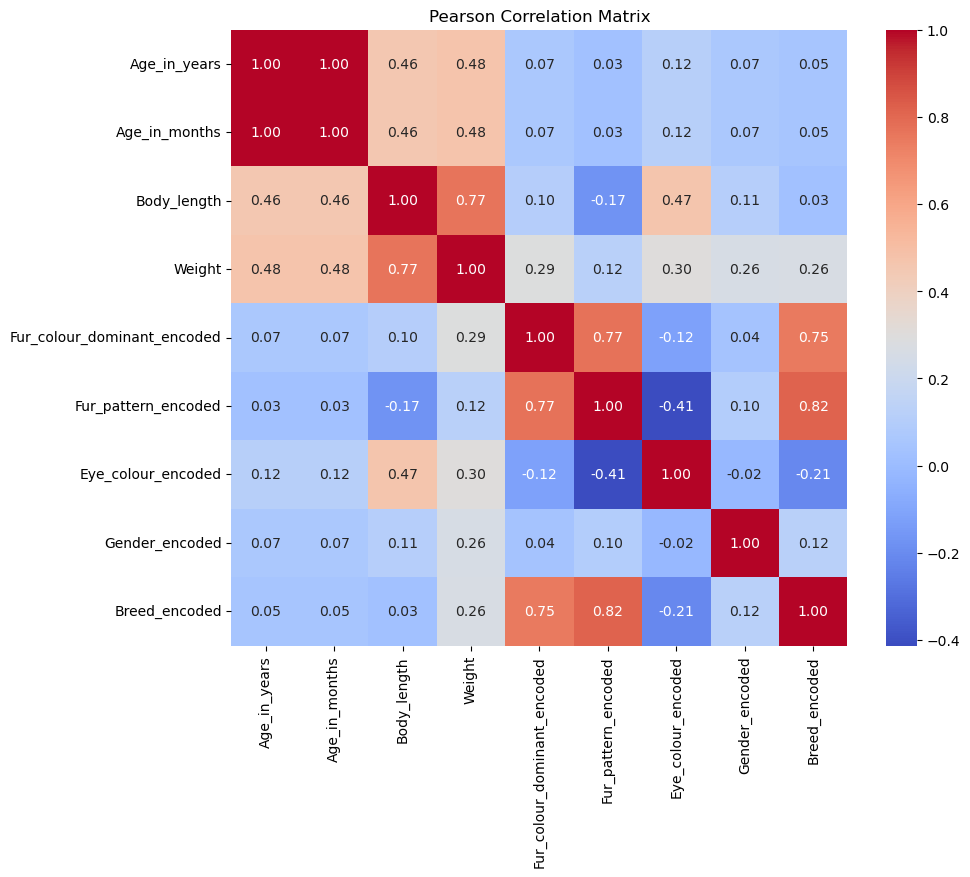

In [ ]:
# Pearson Correlation including categorical
pears_cols = ['Age_in_years','Age_in_months','Body_length','Weight','Fur_colour_dominant_encoded','Fur_pattern_encoded','Eye_colour_encoded','Gender_encoded','Breed_encoded']

corr_matrix = df_clean[pears_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson Correlation Matrix")
plt.show()

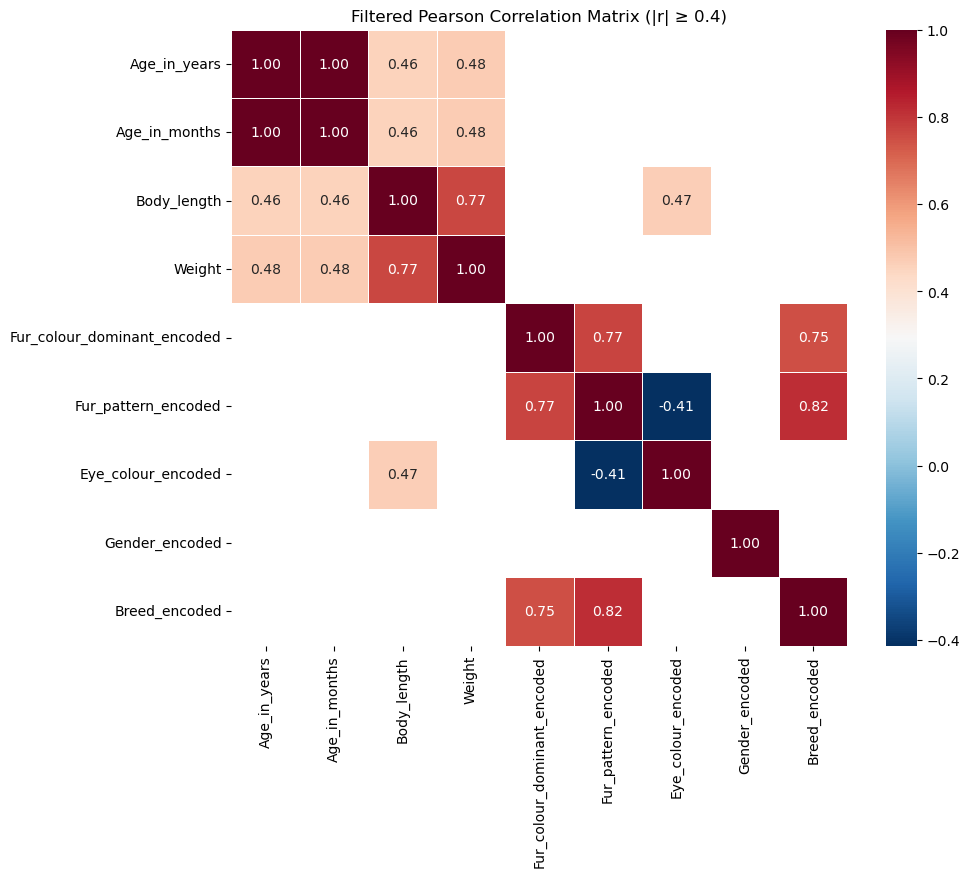

In [35]:
# Create a mask for correlations with abs value < 0.3
mask = (np.abs(corr_matrix) < 0.4)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            cmap='RdBu_r', 
            fmt=".2f", 
            square=True, 
            linewidths=0.5,
            cbar=True)
plt.title("Filtered Pearson Correlation Matrix (|r| ≥ 0.4)")
plt.show()

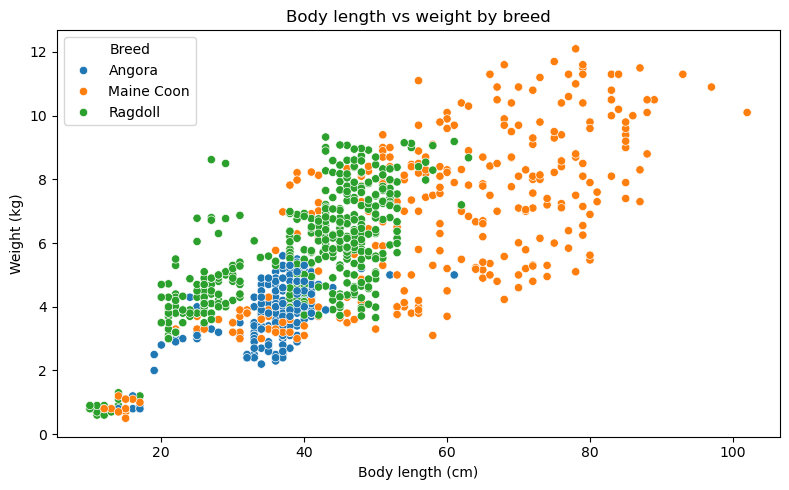

In [ ]:
# Body length vs weight
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='Body_length', y='Weight', hue='Breed')
plt.title('Body length vs weight by breed')
plt.xlabel('Body length (cm)')
plt.ylabel('Weight (kg)')
# Units are assumed given the British spelling
# Googled average values for these different breeds and they match the imperial unit system
plt.tight_layout()
plt.show()

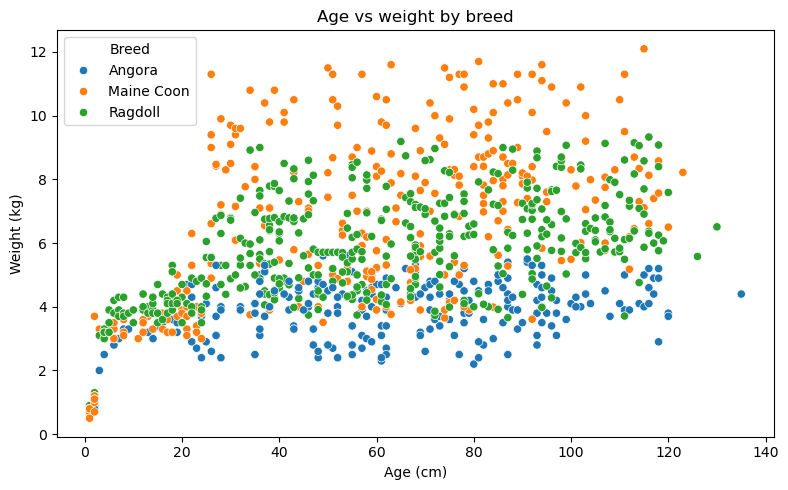

In [37]:
# Age vs Weight
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='Age_in_months', y='Weight', hue='Breed')
plt.title('Age vs weight by breed')
plt.xlabel('Age (cm)')
plt.ylabel('Weight (kg)')
plt.tight_layout()
plt.show()

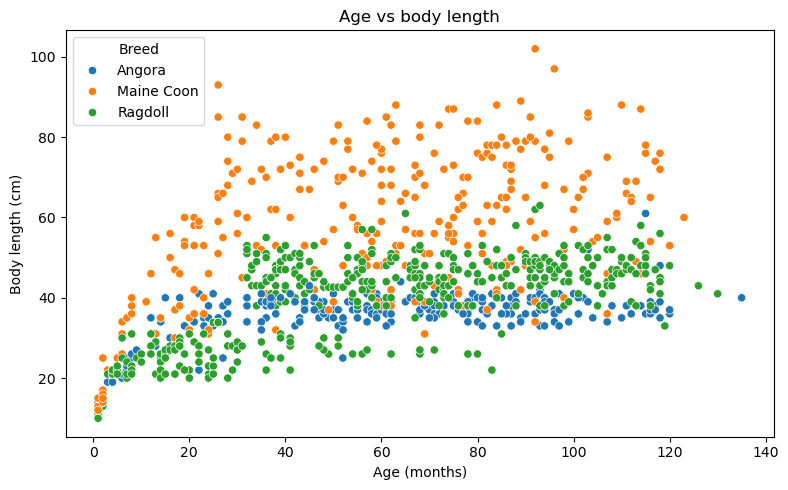

In [38]:
# Age vs Body length
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='Age_in_months', y='Body_length', hue='Breed')
plt.title('Age vs body length')
plt.xlabel('Age (months)')
plt.ylabel('Body length (cm)')
plt.tight_layout()
plt.show()

In [ ]:
# Drop final rows that still are null
df_clean = df_clean.dropna()

# Export final cleaned version of dataframe to csv
df_clean.to_csv('raining_cats_cleaned.csv', index=False)